In [3]:
#Import des librairies pour le fonctionnement du programme

In [4]:
import os

import numpy as np
import scipy.stats
import matplotlib as mpl
import matplotlib.pyplot as plt

PATH = "2nd_test"
Fs=20480
Ts=488.28

In [5]:
def load_data():
    data = []
    for filename in sorted(os.listdir(PATH)):
        f = os.path.join(PATH, filename)
        with open(f, "r") as file:
            lines = file.readlines()
            for line in lines:
                data.append(line.replace("\n", "").split("\t"))
    return np.asarray(data).astype('float64')

def load_file(file):
    data = []
    f = os.path.join(PATH, file)
    with open(f, "r") as file:
        lines = file.readlines()
        for line in lines:
            data.append(line.replace("\n", "").split("\t"))
    return np.asarray(data).astype('float64')

In [6]:

def find_n_file(n):
    for index,filename in enumerate(sorted(os.listdir(PATH))):
        if index == n-1:
            return filename
    
first = find_n_file(100)
second = find_n_file(750)

print("first :",first)
print("second :",second)


first_data = load_file(first)
second_data = load_file(second)



first : 2004.02.13.03.02.39
second : 2004.02.17.15.22.39


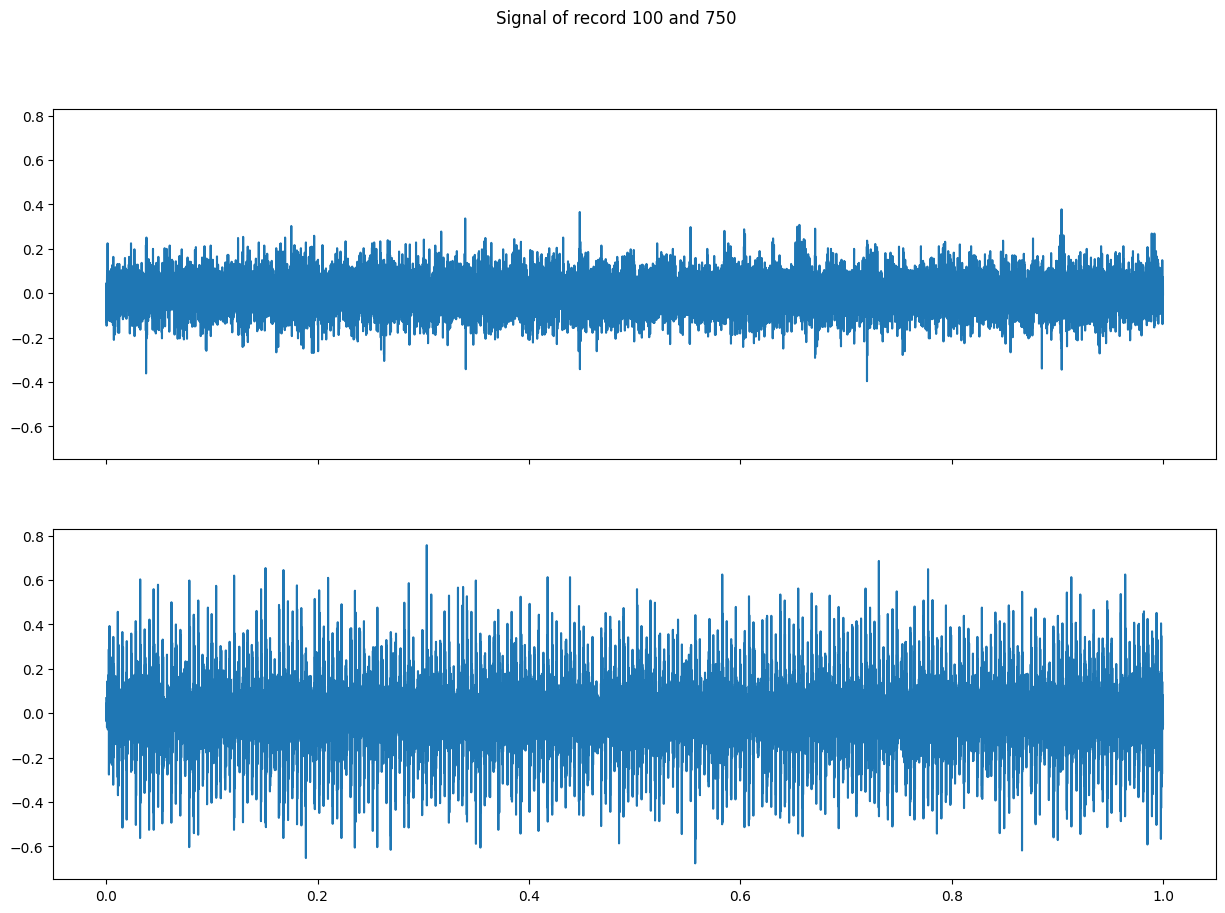

In [7]:


fig, axs = plt.subplots(2, sharex=True, sharey=True, figsize=(15, 10))
fig.suptitle('Signal of record 100 and 750')
axs[0].plot(np.linspace(0, 1, len(first_data)), first_data[:, 0])
axs[1].plot(np.linspace(0, 1, len(second_data)), second_data[:, 0])



In [8]:
## On peut constater que la vibration augmente dans le temp, l'amplitude observé sur le signal 1 est plus grande 
## que l'amplitude sur le signel 2

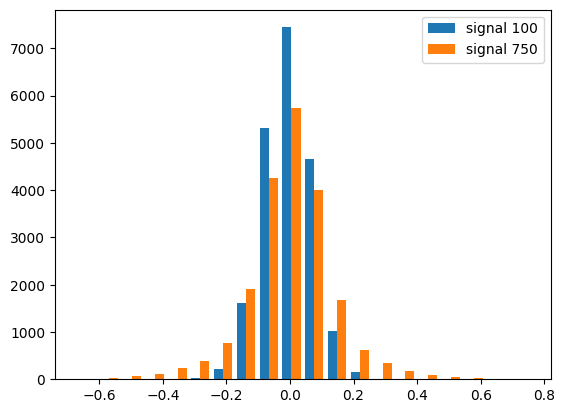

In [9]:
plt.hist([first_data[:, 0], second_data[:, 0]], bins=20, label=["signal 100", "signal 750"])
plt.legend(prop={'size': 10})
plt.show()

In [10]:
##On peut constater que les relevé sur le signal plus tardif sont beaucoup plus dispersé, cela est du aux vibrations

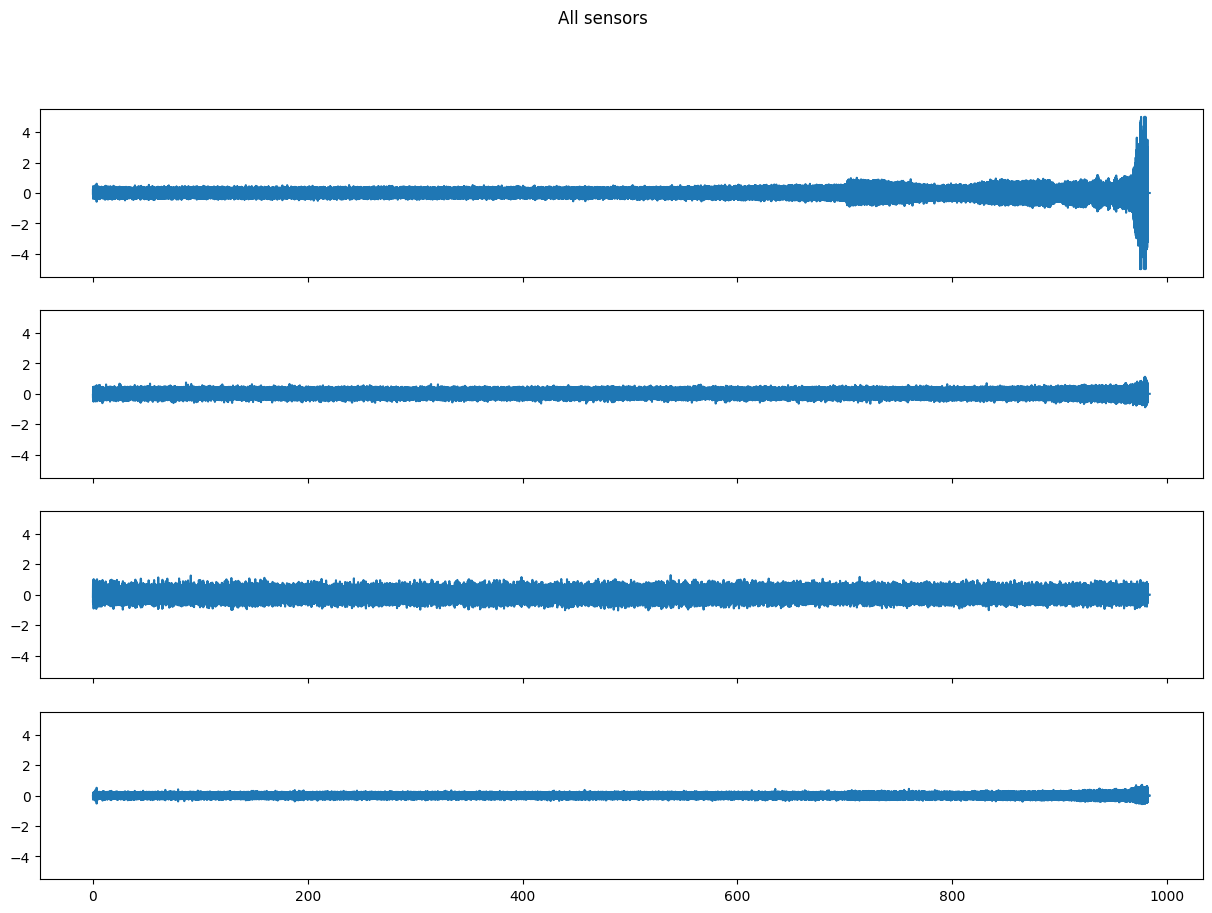

In [11]:
data = load_data()


fig, axs = plt.subplots(4, sharex=True, sharey=True, figsize=(15, 10))
fig.suptitle('All sensors')
for i in range(4):
    axs[i].plot(np.linspace(0, 984, len(data)), data[:, i])


In [15]:
## En comparant les 4 signaux relevé par les capteurs, on peut observer une vibration 

In [16]:
## anormale exponentielle sur le 1er capteur

In [29]:
# Exercice 2

In [30]:
## Implémentation de peak-to-peak

In [19]:
def peak_to_peak(data):
    return max(data) - min (data)

print(peak_to_peak(first_data[:, 0]))
print(np.ptp(first_data[:, 0]))

0.774
0.774


In [20]:
# Implémentation de Root Mean Square

In [22]:
def root_mean_square(data):
    total = 0
    for x in data:
        total += x ** 2
    return np.sqrt(1/len(data) * total)

print(root_mean_square(first_data[:, 0]))
print(np.sqrt(np.mean(first_data[:, 0] ** 2)))

0.07571563009461803
0.07571563009461785


In [33]:
# Implémentation de Kurtosis

In [37]:
def kurtosis(data):
    total = 0
    sigma = np.std(data)
    for x in data:
        total += (x / sigma) ** 4
    return 1/len(data) * total

print(kurtosis(first_data[:, 0]))
print(scipy.stats.kurtosis(first_data[:, 0], fisher=False))

3.397683975507308
3.3925339025403614


In [23]:
#  Implémentation de Crest Factor

In [25]:
def crest_factor(data):
    return max(data) / root_mean_square(data)

print(crest_factor(first_data[:, 0]))

4.992364185936673


In [26]:
# Implémentation de Skewness

In [28]:
def skewness(data):
    size = len(data)
    mean = np.mean(data)
    total = 0
    tot_div =0
    for value in data:
        total += (value - mean) ** 3 / size
        tot_div += (value - mean) ** 2 / size
    tot_div = tot_div ** 1.5
    return total / tot_div

def old_my_skewness(data):
    total = 0
    sigma = np.std(data)
    for x in data:
        total += (x / sigma) ** 3
    return 1/len(data) * total

print(skewness(first_data[:, 0]))
print(scipy.stats.skew(first_data[:, 0]))

-0.012775323005233019
-0.012775323005232134


In [31]:
## Statistical indicators

In [38]:
def statistical_indicators(data):
    return peak_to_peak(data), root_mean_square(data), kurtosis(data), crest_factor(data), skewness(data)

print(statistical_indicators(first_data[:, 0]))



(0.774, 0.07571563009461803, 3.397683975507308, 4.992364185936673, -0.012775323005233019)


In [39]:
## Affichage des indicateurs statistiques

In [42]:
peak_to_peak_stats = [[]]*4
root_mean_square_stats = [[]]*4
kurtosis_stats = [[]]*4
crest_stats = [[]]*4
skewnes_stats = [[]]*4

for filename in os.listdir(PATH):
    data = load_file(filename)
    for i in range(4):
        sensor_data = data[:, i]
        stats = statistical_indicators(sensor_data)
        peak_to_peak_stats[i].append(stats[0])
        root_mean_square_stats[i].append(stats[1])
        kurtosis_stats[i].append(stats[2])
        crest_stats[i].append(stats[3])
        skewnes_stats[i].append(stats[4])

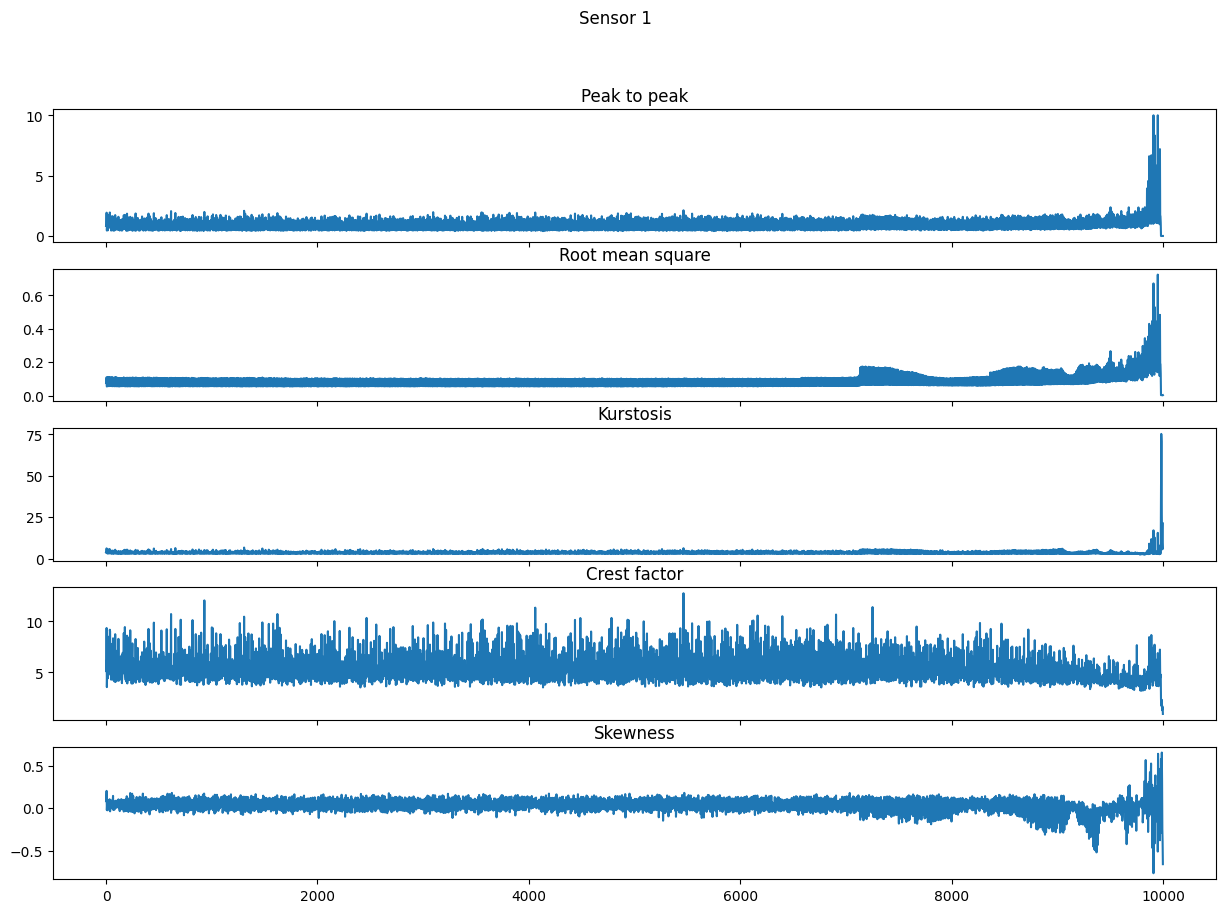

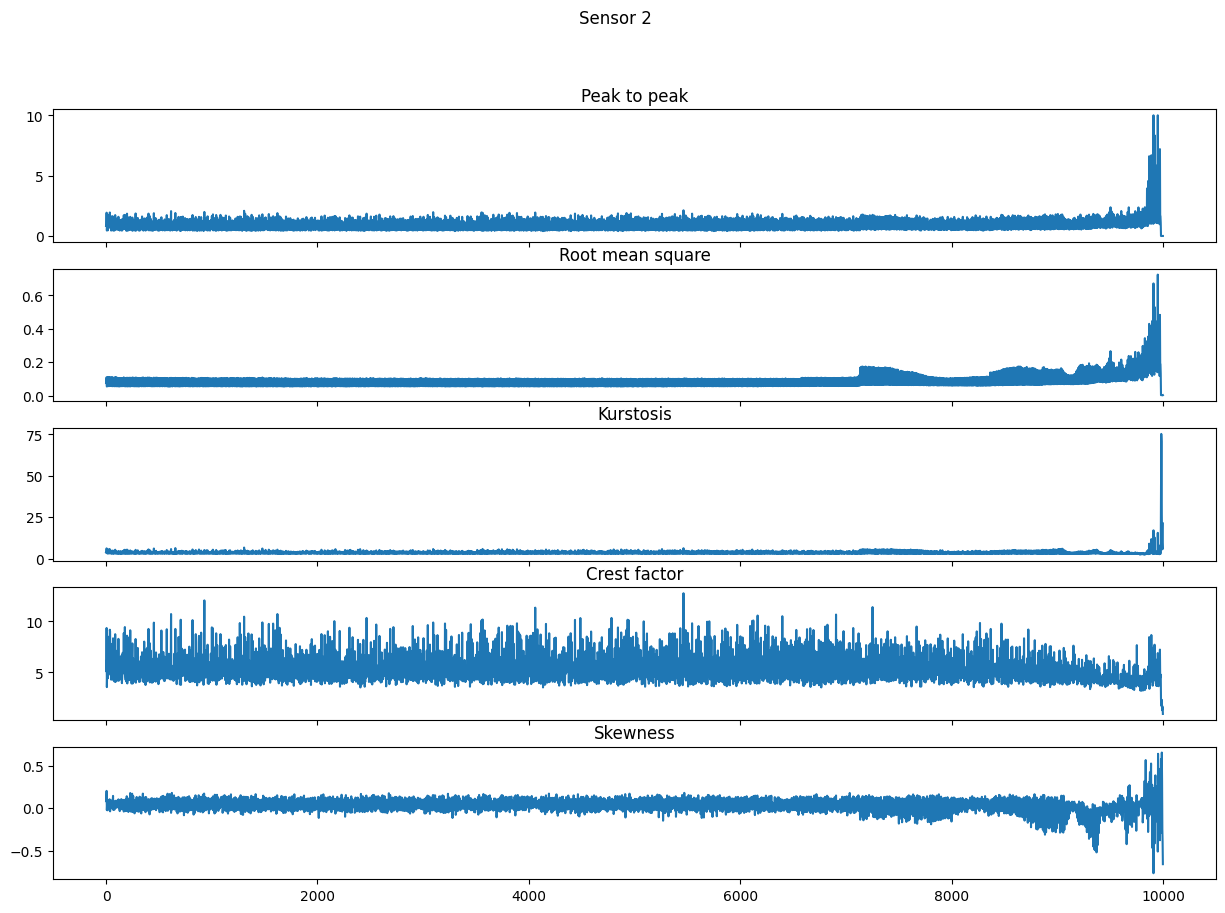

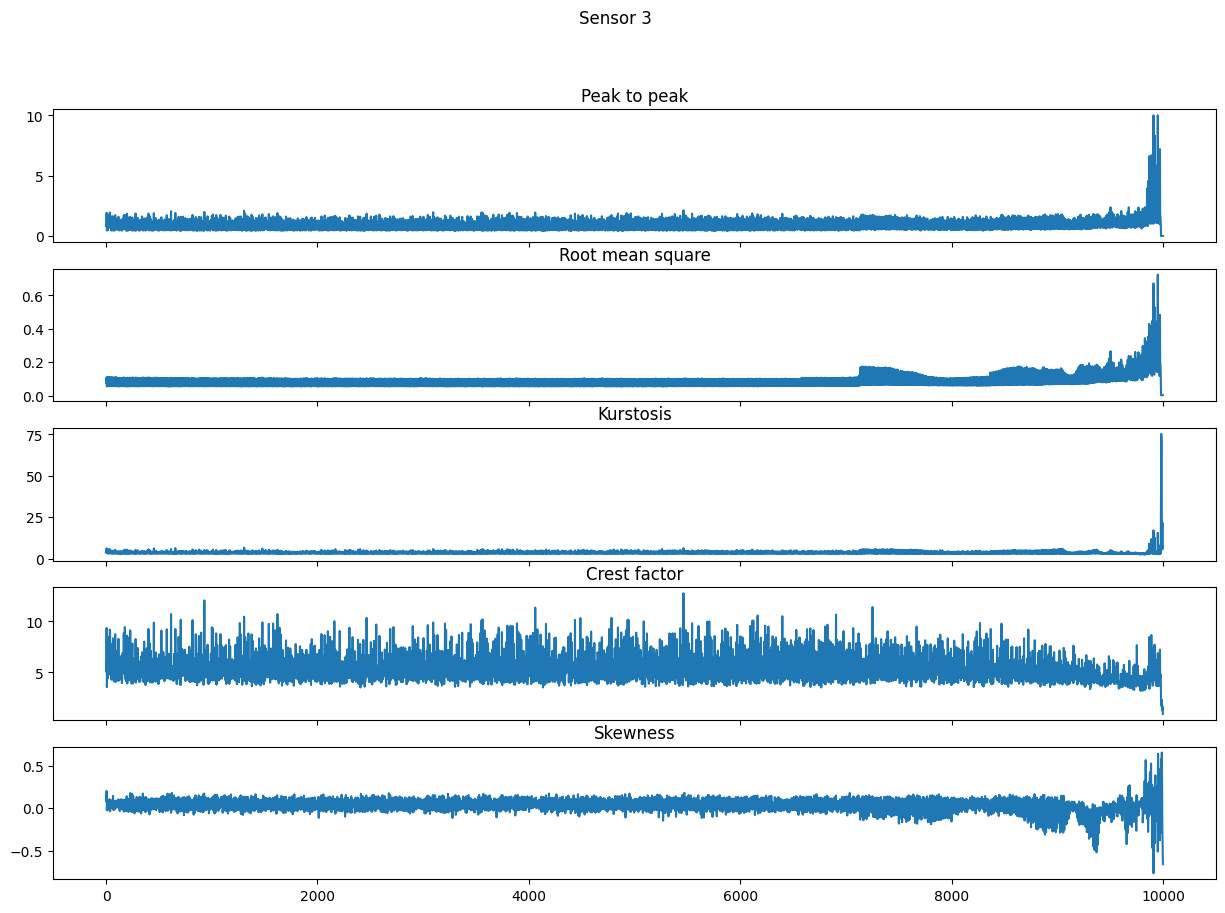

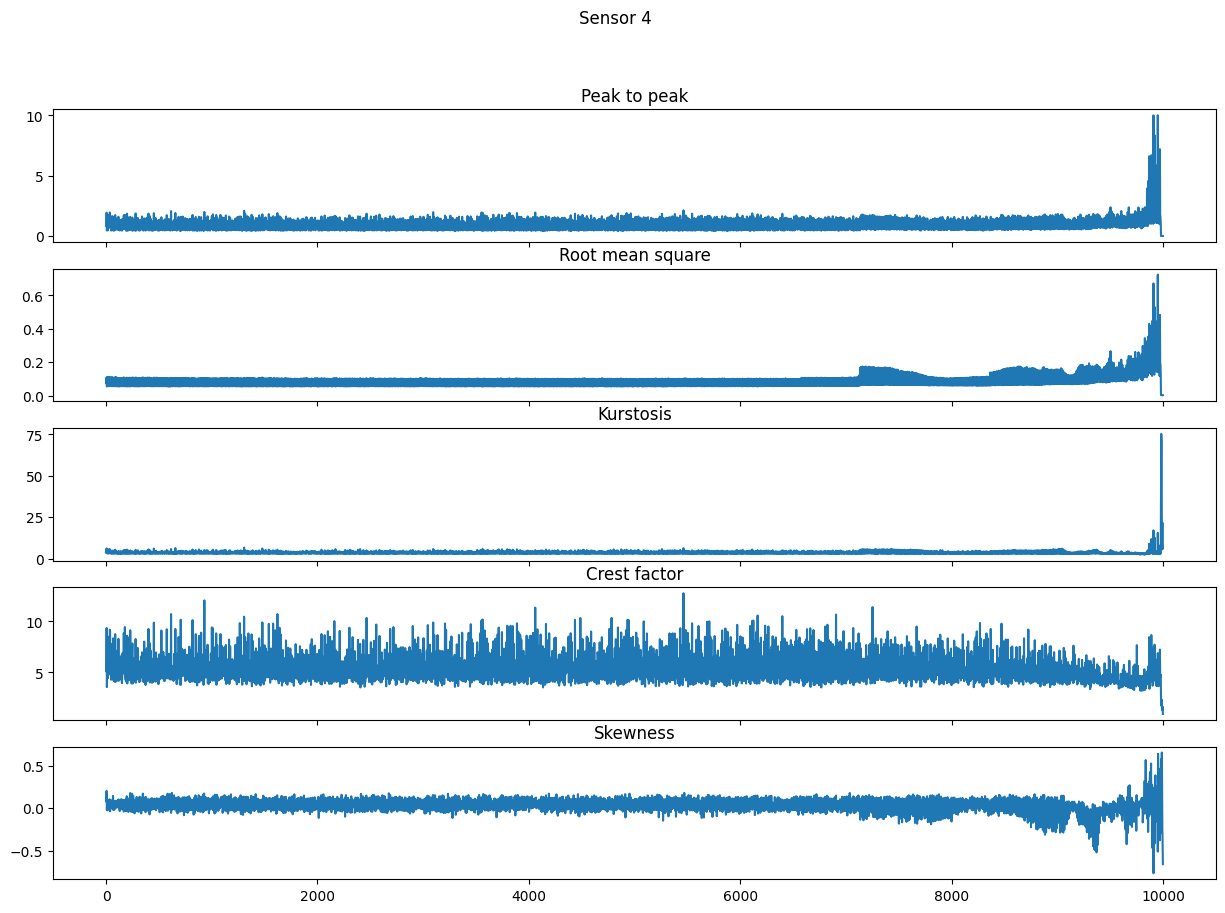

In [45]:
for i in range(4):
    fig, axs = plt.subplots(5, sharex=True, figsize=(15, 10))
    fig.suptitle(f'Sensor {i + 1}')
    axs[0].plot(np.linspace(0, 10000, len(peak_to_peak_stats[i])), peak_to_peak_stats[i])
    axs[0].set_title('Peak to peak')
    axs[1].plot(np.linspace(0, 10000, len(root_mean_square_stats[i])), root_mean_square_stats[i])
    axs[1].set_title('Root mean square')
    axs[2].plot(np.linspace(0, 10000, len(kurtosis_stats[i])), kurtosis_stats[i])
    axs[2].set_title('Kurstosis')
    axs[3].plot(np.linspace(0, 10000, len(crest_stats[i])), crest_stats[i])
    axs[3].set_title('Crest factor')
    axs[4].plot(np.linspace(0, 10000, len(skewnes_stats[i])), skewnes_stats[i])
    axs[4].set_title('Skewness')